In [9]:
# Import packages and functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Import dataset
badDrivers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/bad-drivers.csv')

# Split off 20% of the data to be left out as test data
badDriversTrainingdata, testData = train_test_split(badDrivers, test_size=0.20)

# Store relevant columns as variables
X = badDriversTrainingdata[
    ['Losses incurred by insurance companies for collisions per insured driver ($)']
].values.reshape(-1, 1)
y = badDriversTrainingdata[['Car Insurance Premiums ($)']].values.reshape(-1, 1)
print(X.shape,y.shape)

(40, 1) (40, 1)


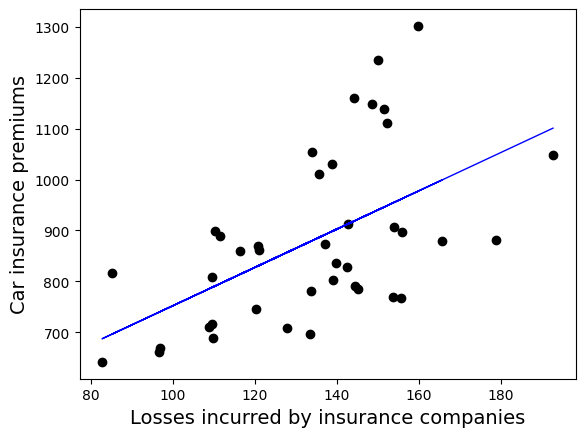

In [12]:
# Fit a linear model to the data
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Plot the fitted model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=1)
plt.xlabel('Losses incurred by insurance companies', fontsize=14);
plt.ylabel('Car insurance premiums', fontsize=14);

In [15]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(
    linModel, X, y, scoring='neg_mean_squared_error', cv=10
)

print(ten_fold_scores)

print(ten_fold_scores.mean())

[17072.8366471  20500.23012269 36036.80223846 42577.23294933
 16546.48880373 15563.76622889  6631.35701977 17360.54345472
 16112.63243321 19332.49398485]
20773.438388274226


In [18]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(linModel, X, y, scoring='neg_mean_squared_error', cv=40)
print(LOOCV_scores)
LOOCV_scores.mean()


[3.17210548e+04 4.71131883e+03 9.78716252e+02 3.42945189e+04
 2.79217947e+03 6.05559939e+03 1.02871163e+04 6.20755600e+04
 3.94274181e+02 1.89491693e+04 9.31089940e+04 4.10230469e+04
 1.17637226e+05 2.84184851e+04 2.00281799e+04 1.67394666e+03
 1.67969784e+04 5.12870533e+02 5.78552662e+03 4.91620081e+04
 9.78908932e+03 1.77004934e+04 2.33112434e+04 9.74486735e+03
 7.19095444e+03 1.29816662e+04 2.23710424e+03 7.14211450e+03
 4.76939171e+03 1.11086483e+04 1.83863928e+04 3.74332328e+04
 3.99068306e+04 1.64197849e+04 6.32068652e+03 9.81868024e-04
 7.52433264e+03 2.59538692e+03 3.56440462e+04 4.00000154e+03]


20515.32596700403

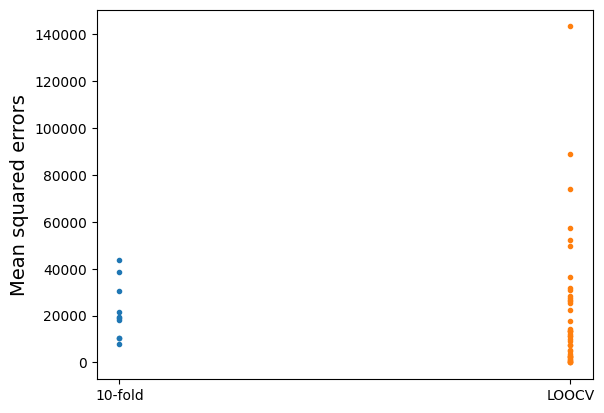

In [ ]:
# Plot the errors for both scores
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14);
plt.xticks([0, 1], ['10-fold', 'LOOCV']);

**LOOCV typically produces higher variance in error estimates: **
1. **Sensitivity to Single Validation Points:**

In LOOCV, each validation error estimate depends entirely on the model's performance on a single data point. If the point is easy to predict, the error will be low; if it’s difficult or an outlier, the error will be high. This sensitivity to each individual point introduces substantial variability in the error estimates across iterations.


**2.Overfitting to Larger Training Sets:**

Since LOOCV uses nearly the entire dataset for training (minus one point), it tends to fit very closely to the data, potentially capturing specific details or noise unique to the training set.
When evaluated on each individual left-out point, this “overfitted” model may perform inconsistently, especially if the left-out point differs from the rest, leading to higher error variability across iterations.


